# Estudo Índice IDEX CDI (Crédito Privado)

## 1. Instalação e importação de bibliotecas

In [1]:
#Importando ferramentas para importação e tratamento de dados
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import quandl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import norm, kurtosis, stats
import plotly.figure_factory as ff
import statistics
from decimal import Decimal

## 2. Tratamento do Banco de Dados

### 2.1 Implementando Parâmetros de Tempo

In [2]:
start_date, end_date = pd.Timestamp(datetime(2017, 8, 1), freq="D") , pd.Timestamp(datetime(2020, 10, 30), freq="D")

In [3]:
start_date, end_date

(Timestamp('2017-08-01 00:00:00', freq='D'),
 Timestamp('2020-10-30 00:00:00', freq='D'))

In [4]:
df = pd.read_excel("fundosbtg.xlsx", index_col="Dates")
df.fillna(method='bfill', inplace=True)
df.head()

IDEXCDI  \
Dates                  
2017-08-01  1.000261   
2017-08-02  1.000732   
2017-08-03  1.000991   
2017-08-04  1.001611   
2017-08-07  1.001831   

            Valor da Cota\n\n09.720.734/0001-10\nAf Invest FI RF Créd Priv Geraes   \
Dates                                                                                
2017-08-01                                           2.611997                        
2017-08-02                                           2.612957                        
2017-08-03                                           2.613864                        
2017-08-04                                           2.614798                        
2017-08-07                                           2.615879                        

            Valor da Cota\n\n29.044.189/0001-04\nAf Invest Geraes 30 FI RF Créd Priv   \
Dates                                                                                   
2017-08-01                                                1.0                           
2017-08-02                                                1.0                           
2017-08-03                                                1.0                           
2017-08-04                                                1.0                           
2017-08-07                                                1.0                           

            Alfa Polaris - FI RF - Cred Priv   \
Dates                                           
2017-08-01                              100.0   
2017-08-02                              100.0   
2017-08-03                              100.0   
2017-08-04                              100.0   
2017-08-07                              100.0   

            Valor da Cota\n\n28.504.521/0001-03\nAlfa Sirius - FI RF - Créd Priv   \
Dates                                                                               
2017-08-01                                              100.0                       
2017-08-02                                              100.0                       
2017-08-03                                              100.0                       
2017-08-04                                              100.0                       
2017-08-07                                              100.0                       

            Valor da Cota\n\n32.238.591/0001-26\nAngá High Yield Feeder FICFI RF Créd Priv II   \
Dates                                                                                            
2017-08-01                                                1.0                                    
2017-08-02                                                1.0                                    
2017-08-03                                                1.0                                    
2017-08-04                                                1.0                                    
2017-08-07                                                1.0                                    

            Valor da Cota\n\n30.910.036/0001-73\nAngá High Yield FI Em RF Créd Priv   \
Dates                                                                                  
2017-08-01                                                1.0                          
2017-08-02                                                1.0                          
2017-08-03                                                1.0                          
2017-08-04                                                1.0                          
2017-08-07                                                1.0                          

            Valor da Cota\n\n20.441.301/0001-68\nArtesanal Créd Priv FICFI MM   \
Dates                                                                            
2017-08-01                                           1.627524                    
2017-08-02                                           1.628264                    
2017-08-03                                   

### 2.2 Obtendo a Matriz com os Retornos

In [5]:
# Retorno do Índice
df_retornos = df.pct_change().drop(df.index[0])
df_retornos.head()

IDEXCDI  \
Dates                  
2017-08-02  0.000471   
2017-08-03  0.000259   
2017-08-04  0.000619   
2017-08-07  0.000220   
2017-08-08  0.000561   

            Valor da Cota\n\n09.720.734/0001-10\nAf Invest FI RF Créd Priv Geraes   \
Dates                                                                                
2017-08-02                                           0.000368                        
2017-08-03                                           0.000347                        
2017-08-04                                           0.000357                        
2017-08-07                                           0.000414                        
2017-08-08                                           0.000339                        

            Valor da Cota\n\n29.044.189/0001-04\nAf Invest Geraes 30 FI RF Créd Priv   \
Dates                                                                                   
2017-08-02                                                0.0                           
2017-08-03                                                0.0                           
2017-08-04                                                0.0                           
2017-08-07                                                0.0                           
2017-08-08                                                0.0                           

            Alfa Polaris - FI RF - Cred Priv   \
Dates                                           
2017-08-02                                0.0   
2017-08-03                                0.0   
2017-08-04                                0.0   
2017-08-07                                0.0   
2017-08-08                                0.0   

            Valor da Cota\n\n28.504.521/0001-03\nAlfa Sirius - FI RF - Créd Priv   \
Dates                                                                               
2017-08-02                                                0.0                       
2017-08-03                                                0.0                       
2017-08-04                                                0.0                       
2017-08-07                                                0.0                       
2017-08-08                                                0.0                       

            Valor da Cota\n\n32.238.591/0001-26\nAngá High Yield Feeder FICFI RF Créd Priv II   \
Dates                                                                                            
2017-08-02                                                0.0                                    
2017-08-03                                                0.0                                    
2017-08-04                                                0.0                                    
2017-08-07                                                0.0                                    
2017-08-08                                                0.0                                    

            Valor da Cota\n\n30.910.036/0001-73\nAngá High Yield FI Em RF Créd Priv   \
Dates                                                                                  
2017-08-02                                                0.0                          
2017-08-03                                                0.0                          
2017-08-04                                                0.0                          
2017-08-07                                                0.0                          
2017-08-08                                                0.0                          

            Valor da Cota\n\n20.441.301/0001-68\nArtesanal Créd Priv FICFI MM   \
Dates                                                                            
2017-08-02                                           0.000455                    
2017-08-03                                           0.000454                    
2017-08-04                                   

In [6]:
df_retornos = df_retornos.loc[start_date:end_date, :]
df_retornos.head()

IDEXCDI  \
Dates                  
2017-08-02  0.000471   
2017-08-03  0.000259   
2017-08-04  0.000619   
2017-08-07  0.000220   
2017-08-08  0.000561   

            Valor da Cota\n\n09.720.734/0001-10\nAf Invest FI RF Créd Priv Geraes   \
Dates                                                                                
2017-08-02                                           0.000368                        
2017-08-03                                           0.000347                        
2017-08-04                                           0.000357                        
2017-08-07                                           0.000414                        
2017-08-08                                           0.000339                        

            Valor da Cota\n\n29.044.189/0001-04\nAf Invest Geraes 30 FI RF Créd Priv   \
Dates                                                                                   
2017-08-02                                                0.0                           
2017-08-03                                                0.0                           
2017-08-04                                                0.0                           
2017-08-07                                                0.0                           
2017-08-08                                                0.0                           

            Alfa Polaris - FI RF - Cred Priv   \
Dates                                           
2017-08-02                                0.0   
2017-08-03                                0.0   
2017-08-04                                0.0   
2017-08-07                                0.0   
2017-08-08                                0.0   

            Valor da Cota\n\n28.504.521/0001-03\nAlfa Sirius - FI RF - Créd Priv   \
Dates                                                                               
2017-08-02                                                0.0                       
2017-08-03                                                0.0                       
2017-08-04                                                0.0                       
2017-08-07                                                0.0                       
2017-08-08                                                0.0                       

            Valor da Cota\n\n32.238.591/0001-26\nAngá High Yield Feeder FICFI RF Créd Priv II   \
Dates                                                                                            
2017-08-02                                                0.0                                    
2017-08-03                                                0.0                                    
2017-08-04                                                0.0                                    
2017-08-07                                                0.0                                    
2017-08-08                                                0.0                                    

            Valor da Cota\n\n30.910.036/0001-73\nAngá High Yield FI Em RF Créd Priv   \
Dates                                                                                  
2017-08-02                                                0.0                          
2017-08-03                                                0.0                          
2017-08-04                                                0.0                          
2017-08-07                                                0.0                          
2017-08-08                                                0.0                          

            Valor da Cota\n\n20.441.301/0001-68\nArtesanal Créd Priv FICFI MM   \
Dates                                                                            
2017-08-02                                           0.000455                    
2017-08-03                                           0.000454                    
2017-08-04                                   

### 2.3 Obtendo a Matriz de Correlação e Localizando os Fundos

In [7]:
df_retornos.corr()

IDEXCDI  \
IDEXCDI                                             1.000000   
Valor da Cota\n\n09.720.734/0001-10\nAf Invest ...  0.304443   
Valor da Cota\n\n29.044.189/0001-04\nAf Invest ...  0.366588   
Alfa Polaris - FI RF - Cred Priv                    0.594763   
Valor da Cota\n\n28.504.521/0001-03\nAlfa Siriu...  0.439969   
...                                                      ...   
Valor da Cota\n\n17.313.316/0001-36\nValora Hor...  0.017609   
Valor da Cota\n\n32.397.281/0001-54\nValora Mog... -0.196818   
Valor da Cota\n\n04.240.128/0001-83\nBv Crédito...  0.021279   
Valor da Cota\n\n14.491.665/0001-50\nBv RF Créd...  0.300268   
Valor da Cota\n\n00.817.677/0001-17\nWestern As...  0.390000   

                                                    Valor da Cota\n\n09.720.734/0001-10\nAf Invest FI RF Créd Priv Geraes   \
IDEXCDI                                                                                      0.304443                        
Valor da Cota\n\n09.720.734/0001-10\nAf Invest ...                                           1.000000                        
Valor da Cota\n\n29.044.189/0001-04\nAf Invest ...                                           0.890182                        
Alfa Polaris - FI RF - Cred Priv                                                             0.507061                        
Valor da Cota\n\n28.504.521/0001-03\nAlfa Siriu...                                           0.538811                        
...                                                                                               ...                        
Valor da Cota\n\n17.313.316/0001-36\nValora Hor...                                           0.193055                        
Valor da Cota\n\n32.397.281/0001-54\nValora Mog...                                          -0.260867                        
Valor da Cota\n\n04.240.128/0001-83\nBv Crédito...                                           0.023615                        
Valor da Cota\n\n14.491.665/0001-50\nBv RF Créd...                                           0.440053                        
Valor da Cota\n\n00.817.677/0001-17\nWestern As...                                           0.540403                        

                                                    Valor da Cota\n\n29.044.189/0001-04\nAf Invest Geraes 30 FI RF Créd Priv   \
IDEXCDI                                                                                      0.366588                           
Valor da Cota\n\n09.720.734/0001-10\nAf Invest ...                                           0.890182                           
Valor da Cota\n\n29.044.189/0001-04\nAf Invest ...                                           1.000000                           
Alfa Polaris - FI RF - Cred Priv                                                             0.579553                           
Valor da Cota\n\n28.504.521/0001-03\nAlfa Siriu...                                           0.639862                           
...                                                                                               ...                           
Valor da Cota\n\n17.313.316/0001-36\nValora Hor...                                           0.093707                           
Valor da Cota\n\n32.397.281/0001-54\nValora Mog...                                          -0.175780                           
Valor da Cota\n\n04.240.128/0001-83\nBv Crédito...                                           0.030822                           
Valor da Cota\n\n14.491.665/0001-50\nBv RF Créd...                                           0.387569                           
Valor da Cota\n\n00.817.677/0001-17\nWestern As...                                           0.557035                           

                                                    Alfa Polaris - FI RF - Cred Priv   \
IDEXCDI                                                                      0.594763   
Valor da Cota\n\n09.720.734/0001-10\nAf Inve

In [8]:
# Visualizar todas as colunas e linhas
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

### 2.3.1 Fundos de maior correlação durante todo o período

In [9]:
#df_retornos.corr().to_excel("corrbtg2.xlsx")

In [10]:
df_retornos.corr()["IDEXCDI"].sort_values(axis = 0, ascending = False, kind = "quicksort")
#dropid1 = uuu.drop("IDEXCDI", axis = 0)
#total = dropid1.head(5)

IDEXCDI                                                                             1.000000
Alfa Polaris - FI RF - Cred Priv                                                    0.594763
Maua High Grade FICFI RF Cred Priv                                                  0.578295
Az Quest Altro FICFI MM Cred Priv                                                   0.573689
Claritas FI RF Cred Priv LP                                                         0.540432
                                                                                      ...   
Valor da Cota\n\n30.509.221/0001-50\nV8 Cash FI RF Créd Priv                       -0.028577
Valor da Cota\n\n32.300.395/0001-34\nM8 Credit Strategy Plus FICFI MM Créd Priv    -0.036180
Valor da Cota\n\n35.726.300/0001-37\nBrave I FICFI MM Créd Priv                    -0.066518
Valor da Cota\n\n34.096.240/0001-53\nLeste Cp Brasil FICFI MM Créd Priv            -0.087652
Valor da Cota\n\n32.397.281/0001-54\nValora Mogno FI MM Créd Priv     

In [11]:
#df_retornos.corr()["IDEXCDI"].sort_values(axis = 0, ascending = False, kind = "quicksort").to_excel("corrtotal.xlsx")

In [12]:
# Especificar Data para colher os dados
df_covid = df_retornos[(df_retornos.index > "2020-03-01") & (df_retornos.index <= "today")]
corr = df_covid.corr()["IDEXCDI"].sort_values(ascending = False)
df_covid.tail()

IDEXCDI  \
Dates                  
2020-10-26  0.000149   
2020-10-27 -0.000080   
2020-10-28  0.000223   
2020-10-29  0.000442   
2020-10-30 -0.000261   

            Valor da Cota\n\n09.720.734/0001-10\nAf Invest FI RF Créd Priv Geraes   \
Dates                                                                                
2020-10-26                                           0.000058                        
2020-10-27                                           0.000104                        
2020-10-28                                          -0.000182                        
2020-10-29                                           0.000073                        
2020-10-30                                          -0.000118                        

            Valor da Cota\n\n29.044.189/0001-04\nAf Invest Geraes 30 FI RF Créd Priv   \
Dates                                                                                   
2020-10-26                                           0.000068                           
2020-10-27                                           0.000171                           
2020-10-28                                           0.000088                           
2020-10-29                                           0.000121                           
2020-10-30                                           0.000099                           

            Alfa Polaris - FI RF - Cred Priv   \
Dates                                           
2020-10-26                           0.000208   
2020-10-27                           0.000021   
2020-10-28                           0.000037   
2020-10-29                           0.000290   
2020-10-30                           0.000021   

            Valor da Cota\n\n28.504.521/0001-03\nAlfa Sirius - FI RF - Créd Priv   \
Dates                                                                               
2020-10-26                                           0.000127                       
2020-10-27                                           0.000036                       
2020-10-28                                          -0.000010                       
2020-10-29                                           0.000170                       
2020-10-30                                          -0.000030                       

            Valor da Cota\n\n32.238.591/0001-26\nAngá High Yield Feeder FICFI RF Créd Priv II   \
Dates                                                                                            
2020-10-26                                           0.000333                                    
2020-10-27                                           0.000286                                    
2020-10-28                                           0.000338                                    
2020-10-29                                           0.000354                                    
2020-10-30                                           0.000165                                    

            Valor da Cota\n\n30.910.036/0001-73\nAngá High Yield FI Em RF Créd Priv   \
Dates                                                                                  
2020-10-26                                           0.000363                          
2020-10-27                                           0.000314                          
2020-10-28                                           0.000367                          
2020-10-29                                           0.000384                          
2020-10-30                                           0.000204                          

            Valor da Cota\n\n20.441.301/0001-68\nArtesanal Créd Priv FICFI MM   \
Dates                                                                            
2020-10-26                                           0.000228                    
2020-10-27                                           0.000219                    
2020-10-28                                   

### 2.3.2 Fundos de maior correlação nos últimos 3 meses

In [13]:
df_retornos.tail(62).corr()["IDEXCDI"].sort_values(axis = 0, ascending = False, kind = "quicksort")
#dropid2 = vvv.drop("IDEXCDI", axis = 0)
#last3 = dropid2.head(5)
#print(last3)

IDEXCDI                                                                                                                      1.000000
Quasar Advantage FI RF Cred Priv LP                                                                                          0.801374
Valor da Cota\n\n29.196.922/0001-06\nQuasar Advantage Plus FI RF Créd Priv LP                                                0.800224
Sparta Top FICFI RF Cred Priv LP                                                                                             0.727132
Az Quest Luce FICFI RF Cred Priv LP                                                                                          0.714257
                                                                                                                               ...   
Valor da Cota\n\n26.759.909/0001-11\nSparta Debênt Incent FIC de Fundos Incentivados de Invest Em Infraestrutura RF         -0.365261
Valor da Cota\n\n26.605.199/0001-75\nCapitânia FIC de Fundos I

In [14]:
#df_retornos.tail(62).corr()["IDEXCDI"].sort_values(axis = 0, ascending = False, kind = "quicksort").to_excel("corrtri.xlsx")

### 2.3.3 Fundos de maior correlação pré-COVID

In [15]:
df_retornos.head(644).corr()["IDEXCDI"].sort_values(axis = 0, ascending = False, kind = "quicksort")  # Corrigir para data

IDEXCDI                                                                                                         1.000000
Rio Bravo Cred Priv FI RF                                                                                       0.349549
Valor da Cota\n\n18.316.558/0001-46\nBrasil Plural Crédito Corporativo II FI Em Cotas de FI RF Créd Priv LP     0.286348
Valor da Cota\n\n04.899.128/0001-90\nSul América Excellence FI RF Créd Priv                                     0.279977
Az Quest Luce FICFI RF Cred Priv LP                                                                             0.278151
                                                                                                                  ...   
Valor da Cota\n\n37.310.657/0001-65\nIbiuna Credit FICFI MM Créd Priv                                                NaN
Valor da Cota\n\n37.227.745/0001-06\nIntegral Selection FI RF Créd Priv LP                                           NaN
Valor da Cota\n\n37.970.369/0001

In [16]:
#df_retornos.head(644).corr()["IDEXCDI"].sort_values(axis = 0, ascending = False).to_excel("corr_pre_covid.xlsx")

In [17]:
df_retornos.columns.get_loc("Rio Bravo Cred Priv FI RF ")

95

In [18]:
df_retornos.corr()["IDEXCDI"].sort_values(axis = 0, ascending = False)

IDEXCDI                                                                             1.000000
Alfa Polaris - FI RF - Cred Priv                                                    0.594763
Maua High Grade FICFI RF Cred Priv                                                  0.578295
Az Quest Altro FICFI MM Cred Priv                                                   0.573689
Claritas FI RF Cred Priv LP                                                         0.540432
                                                                                      ...   
Valor da Cota\n\n30.509.221/0001-50\nV8 Cash FI RF Créd Priv                       -0.028577
Valor da Cota\n\n32.300.395/0001-34\nM8 Credit Strategy Plus FICFI MM Créd Priv    -0.036180
Valor da Cota\n\n35.726.300/0001-37\nBrave I FICFI MM Créd Priv                    -0.066518
Valor da Cota\n\n34.096.240/0001-53\nLeste Cp Brasil FICFI MM Créd Priv            -0.087652
Valor da Cota\n\n32.397.281/0001-54\nValora Mogno FI MM Créd Priv     

### 2.4 Localizando na Matriz os Fundos de Maior Correlação

### 2.4.1 Fundos de maior Correlação à partir de Agosto 2020

In [19]:
#df_retornos.columns.get_loc("Quasar Advantage FI RF Cred Priv LP ") #0.801374
#df_retornos.columns.get_loc("Sparta Top FICFI RF Cred Priv LP ") #0.727132
#df_retornos.columns.get_loc("Az Quest Luce FICFI RF Cred Priv LP ") #0.714257
#df_retornos.columns.get_loc("Daycoval Classic FI RF Cred Priv ") #0.703804
#df_retornos.columns.get_loc("Porto Seguro Ipe RF FICFI Cred Priv LP ") #0.691763

In [20]:
i = ["Quasar Advantage FI RF Cred Priv LP ", "Sparta Top FICFI RF Cred Priv LP ", "Az Quest Luce FICFI RF Cred Priv LP ",
    "Daycoval Classic FI RF Cred Priv ", "Porto Seguro Ipe RF FICFI Cred Priv LP "]

a = [df_retornos.columns.get_loc(col) for col in i]

### 2.4.2 Fundos de maior Correlação período total

In [21]:
#df_retornos.columns.get_loc("Alfa Polaris - FI RF - Cred Priv ") #0.594763
#df_retornos.columns.get_loc("Maua High Grade FICFI RF Cred Priv ") #0.578295
#df_retornos.columns.get_loc("Az Quest Altro FICFI MM Cred Priv ") #0.573689
#df_retornos.columns.get_loc("Claritas FI RF Cred Priv LP ") #0.540432
#df_retornos.columns.get_loc("BNP Paribas Rubi FICFI RF Cred Priv ") #0.537108    

In [22]:
j = ["Alfa Polaris - FI RF - Cred Priv ", "Maua High Grade FICFI RF Cred Priv ", "Az Quest Altro FICFI MM Cred Priv ",
    "Claritas FI RF Cred Priv LP ", "BNP Paribas Rubi FICFI RF Cred Priv ", "Rio Bravo Cred Priv FI RF "]
b = [df_retornos.columns.get_loc(col) for col in j]

In [23]:
df_fundos = df_retornos.iloc[:, np.r_[0, a, b]]

## 3. Gráficos dos Fundos de Maior Correlação

### 3.1 Gráficos dos Retornos

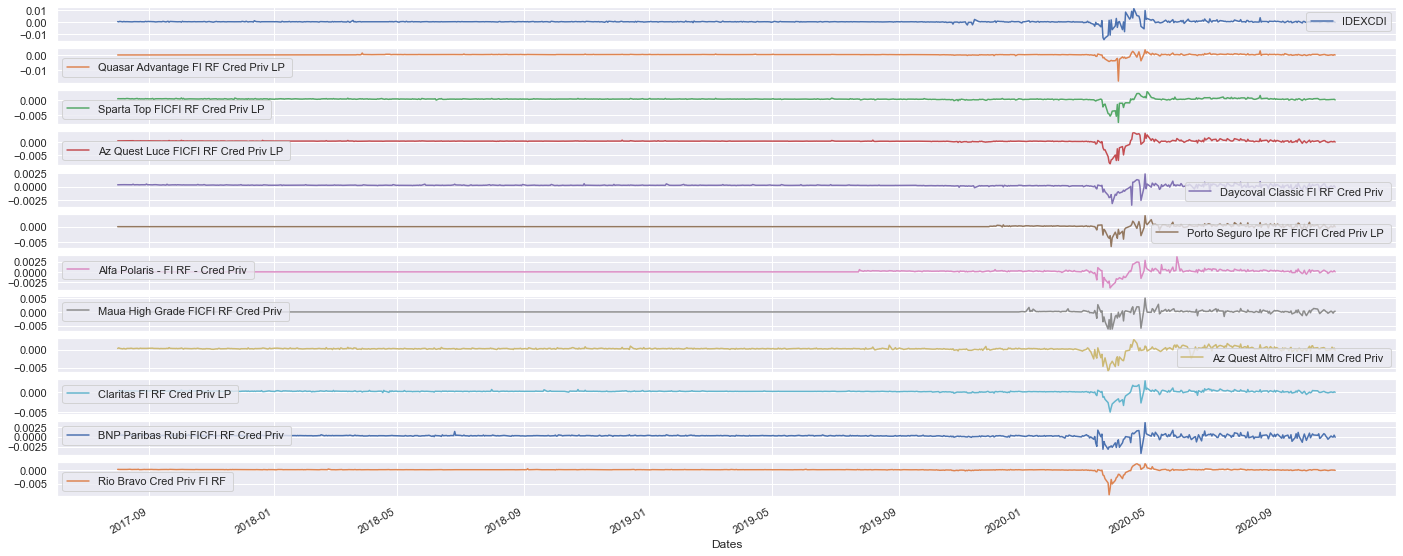

In [24]:
# Subplots com os Retornos separados
sns.set()
df_fundos.plot(subplots=True, figsize=(24,10));

In [25]:
# Plot com os retornos juntos
plt.figure(figsize=(12,8))
figreturn = px.line(df_fundos, title= "Retorno dos fundos de maior correlação")
figreturn.update_layout(showlegend = True)
figreturn.show()

<Figure size 864x576 with 0 Axes>

### 3.2 Rentabilidade Agosto 2017- Outubro 2020 (Valorização das Cotas)

In [26]:
rentabilidade = (1 + df_fundos.dropna()).cumprod()
fig = px.line(rentabilidade, title= "Rentabilidade Agosto 2017 - Outubro 2020", width=1000, height=500)
fig.update_layout(showlegend = True)
fig.show()

### 3.2.1 $\textit{Tracking Error}$

$$
\begin{align}
TE = \sqrt\frac{\sum_{i=1}^{N} (R_{f} - R_{b})^2}{N-1} 
\end{align}
$$


$TE$ = Tracking Error;

$R_{f}$ = Retorno do fundo;

$R_{b}$ = Retorno do benchmark;

$N$ = Número de períodos 


In [27]:
# Número de períodos
N = 815

# Calculando o Tracking Error para cada fundo
ar1 = (((df_fundos["Quasar Advantage FI RF Cred Priv LP "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar2 = (((df_fundos["Sparta Top FICFI RF Cred Priv LP "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar3 = (((df_fundos["Az Quest Luce FICFI RF Cred Priv LP "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar4 = (((df_fundos["Daycoval Classic FI RF Cred Priv "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar5 = (((df_fundos["Porto Seguro Ipe RF FICFI Cred Priv LP "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar6 = (((df_fundos["Alfa Polaris - FI RF - Cred Priv "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar7 = (((df_fundos["Maua High Grade FICFI RF Cred Priv "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar8 = (((df_fundos["Az Quest Altro FICFI MM Cred Priv "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar9 = (((df_fundos["Claritas FI RF Cred Priv LP "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar10 = (((df_fundos["BNP Paribas Rubi FICFI RF Cred Priv "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)
ar11 = (((df_fundos["Rio Bravo Cred Priv FI RF "] - df_fundos["IDEXCDI"])**2)/(N-1))**(1/2)

In [28]:
#df_terror = pd.concat([ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8, ar9, ar10, ar11], axis = 1, sort = False)
#rename_terror = df_terror.rename(columns = {0:"Quasar Advantage", 1:"Sparta Top", 2:"Daycoval Classic", 3:"Az Quest Luce",
#                               4:"Porto Seguro Ipe", 5:"Alfa Polaris Cred Priv", 6:"Maua High Grade", 
#                               7:"Az Quest Altro", 8:"Claritas FI RF Cred Priv", 9:"BNP Paribas Rubi,", 
#                                           10:"Rio Bravo Cred Priv FI RF "}, inplace = True)

In [29]:
tracking1 = ar1.sum()*100
tracking2 = ar2.sum()*100
tracking3 = ar3.sum()*100
tracking4 = ar4.sum()*100
tracking5 = ar5.sum()*100
tracking6 = ar6.sum()*100
tracking7 = ar7.sum()*100
tracking8 = ar8.sum()*100
tracking9 = ar9.sum()*100
tracking10 = ar10.sum()*100
tracking11 = ar11.sum()*100

In [30]:
#fig = px.line(df_terror, title= "Tracking Error", width=1000, height=500)
#fig.update_layout(showlegend = True)
#fig.show()

### 3.3 $\textit{Heat Map}$ (Matrizes de Correlação e Covariância)

### 3.3.1 Correlação durante todo o período

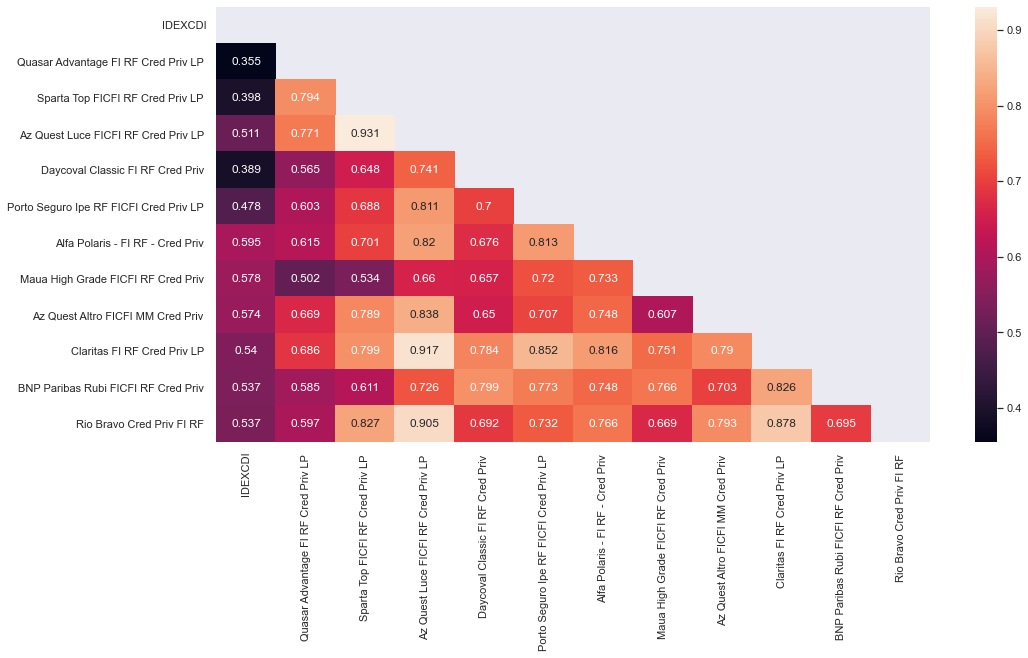

In [31]:
#HeatMap(Correlação 2017~2020)
plt.figure(figsize=(16,8))
mask = np.triu(np.full_like(df_fundos.corr(), fill_value = 1, dtype= np.bool))
sns.heatmap(df_fundos.corr(), mask = mask, annot=True, fmt = ".3g");

### 3.3.2 Correlação dos últimos 3 meses

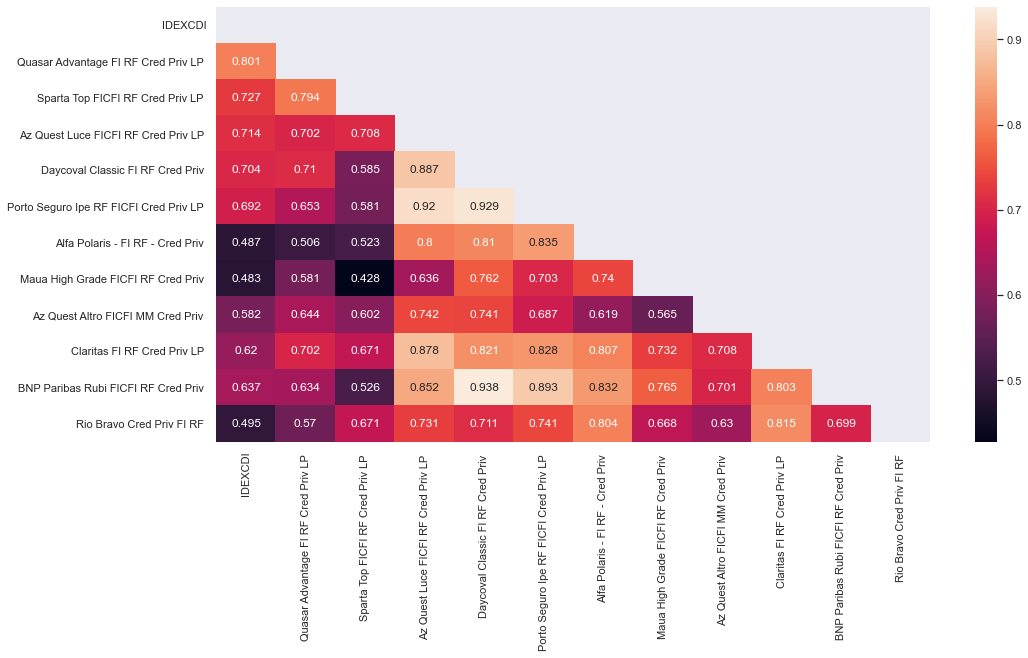

In [32]:
#Correlaçao Agosto 2020 - Outubro 2020
plt.figure(figsize=(16, 8))
mask = np.triu(np.full_like(df_fundos.tail(62).corr(), fill_value = 1, dtype = np.bool))
sns.heatmap(df_fundos.tail(62).corr(), mask = mask, annot = True, fmt = ".3g");

### 3.3.3 Matrizes de Covariância

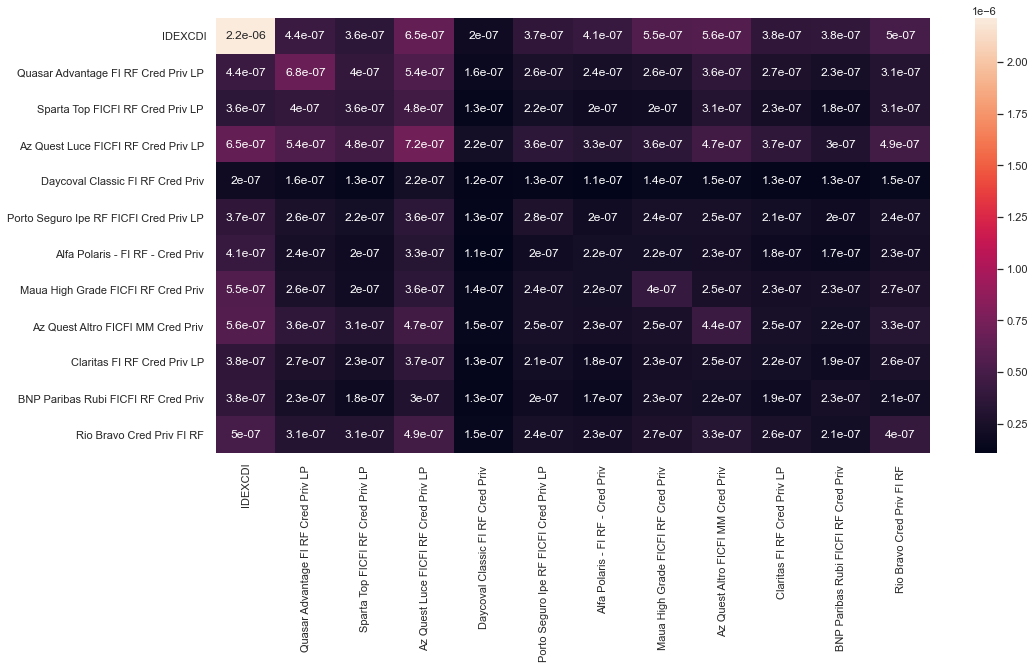

In [33]:
plt.figure(figsize=(16,8))
mask = np.triu(np.full_like(df_fundos.cov(), fill_value = 0, dtype=np.bool))
fig = sns.heatmap(df_fundos.cov(), mask = mask, annot = True)

### 3.4 Distribuição Normal e Curtose

In [34]:
# Gaussianas com a média dos retornos
# Adicionando dados
x1 = df_fundos["IDEXCDI"]
x2 = df_fundos["Quasar Advantage FI RF Cred Priv LP "]
x3 = df_fundos["Sparta Top FICFI RF Cred Priv LP "]
x4 = df_fundos["Az Quest Luce FICFI RF Cred Priv LP "]
x5 = df_fundos["Daycoval Classic FI RF Cred Priv "] 
x6 = df_fundos["Porto Seguro Ipe RF FICFI Cred Priv LP "] 
x7 = df_fundos["Alfa Polaris - FI RF - Cred Priv "]
x8 = df_fundos["Maua High Grade FICFI RF Cred Priv "]
x9 = df_fundos["Az Quest Altro FICFI MM Cred Priv "]
x10 = df_fundos["Claritas FI RF Cred Priv LP "]
x11 = df_fundos["BNP Paribas Rubi FICFI RF Cred Priv "]
x12 = df_fundos["Rio Bravo Cred Priv FI RF "]


# Juntando os dados para os fundos
dados = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12]
labels = ["IDEX CDI", "Quasar Advantage", "Sparta Top", "Az Quest Luce", "Daycoval Classic", "Porto Seguro Ipe", "Alfa Polaris",
         "Maua HIgh Grade", "Az Quest Altro", "Claritas FI RF", "BNP Paribas Rubi", "Rio Bravo Cred Priv FI RF"]

# Criando o Gráfico
fig = ff.create_distplot(dados, labels, bin_size=.2, show_hist=False)
fig.update_layout(title_text= "Distribuição dos Retornos dos Fundos")
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

### 3.5 Tabelas com a Volatilidade Anualizada, Curtose das Distribuições e Tracking Error 

In [35]:
#### Tabela Desvio Padrão e Curtose

# Volatilidade Anualizada
a = 252

kt = kurtosis(df_fundos, fisher=True)
dp = stats.tstd(df_fundos)*100*(a**(1/2))



dados  = [["Fundos", "Volatilidade Anualizada", "Curtose", "Tracking Error"],
         ["IDEXCDI", (str("{:0.2f}".format(dp[0]) + "%")), round(kt[0],2)],
         ["Quasar Advantage FI RF Cred Priv LP ", (str("{:0.2f}".format(dp[1]) + "%")), round(kt[1], 2), (str("{:0.2f}".format(tracking1)) + "%")],
         ["Sparta Top FICFI RF Cred Priv LP ", (str("{:0.2f}".format(dp[2]) + "%")), round(kt[2], 2), (str("{:0.2f}".format(tracking2)) + "%")],
         ["Az Quest Luce FICFI RF Cred Priv LP ", (str("{:0.2f}".format(dp[3]) + "%")), round(kt[3], 2), (str("{:0.2f}".format(tracking3)) + "%")],
         ["Daycoval Classic FI RF Cred Priv ", (str("{:0.2f}".format(dp[4]) + "%")), round(kt[4], 2), (str("{:0.2f}".format(tracking4)) + "%")],
         ["Porto Seguro Ipe RF FICFI Cred Priv LP ", (str("{:0.2f}".format(dp[5]) + "%")), round(kt[5], 2), (str("{:0.2f}".format(tracking5)) + "%")],
         ["Alfa Polaris - FI RF - Cred Priv ", (str("{:0.2f}".format(dp[6]) + "%")), round(kt[6], 2), (str("{:0.2f}".format(tracking6)) + "%")],
         ["Maua High Grade FICFI RF Cred Priv ", (str("{:0.2f}".format(dp[7]) + "%")), round(kt[7], 2), (str("{:0.2f}".format(tracking7)) + "%")],
         ["Az Quest Altro FICFI MM Cred Priv ", (str("{:0.2f}".format(dp[8]) + "%")), round(kt[8], 2), (str("{:0.2f}".format(tracking8)) + "%")],
         ["Claritas FI RF Cred Priv LP ", (str("{:0.2f}".format(dp[9]) + "%")), round(kt[9], 2), (str("{:0.2f}".format(tracking9)) + "%")],
         ["BNP Paribas Rubi FICFI RF Cred Priv ", (str("{:0.2f}".format(dp[10]) + "%")), round(kt[10], 2), (str("{:0.2f}".format(tracking10)) + "%")],
         ["Rio Bravo Cred Priv FI RF ", (str("{:0.2f}".format(dp[11]) + "%")), round(kt[11], 2), (str("{:0.2f}".format(tracking11)) + "%")]]



fig = ff.create_table(dados)
fig.show()

### 3.6 Gráfico de Correlação Movel Trimestral (90 períodos) entre os Fundos e o IDEX CDI

In [36]:
# Parâmetro de rolamento
j = 90

# Calculando a correlação móvel em relação ao IDEXCDI para cada fundo
cm1 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Quasar Advantage FI RF Cred Priv LP "])
cm2 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Sparta Top FICFI RF Cred Priv LP "])
cm3 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Az Quest Luce FICFI RF Cred Priv LP "])
cm4 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Daycoval Classic FI RF Cred Priv "])
cm5 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Porto Seguro Ipe RF FICFI Cred Priv LP "])
cm6 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Alfa Polaris - FI RF - Cred Priv "])
cm7 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Maua High Grade FICFI RF Cred Priv "])
cm8 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Az Quest Altro FICFI MM Cred Priv "])
cm9 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Claritas FI RF Cred Priv LP "])
cm10 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["BNP Paribas Rubi FICFI RF Cred Priv "])
cm11 = df_fundos["IDEXCDI"].rolling(j).corr(df_fundos["Rio Bravo Cred Priv FI RF "])

In [37]:
cmall = pd.concat([cm1, cm2, cm3, cm4, cm5, cm6, cm7, cm8, cm9, cm10, cm11], axis = 1, sort = False)

In [38]:
df_cm = cmall.rename(columns = {0:"Quasar Advantage", 1:"Sparta Top", 2:"Daycoval Classic", 3:"Az Quest Luce",
                               4:"Porto Seguro Ipe", 5:"Alfa Polaris Cred Priv", 6:"Maua High Grade", 
                               7:"Az Quest Altro", 8:"Claritas FI RF Cred Priv", 9:"BNP Paribas Rubi",
                               10: "Rio Bravo Cred Priv FI RF"}, inplace = True)

In [39]:
fig = px.line(cmall, title= "Correlação Móvel dos Fundos com o IDEXCDI (90 períodos)")
fig.show()